
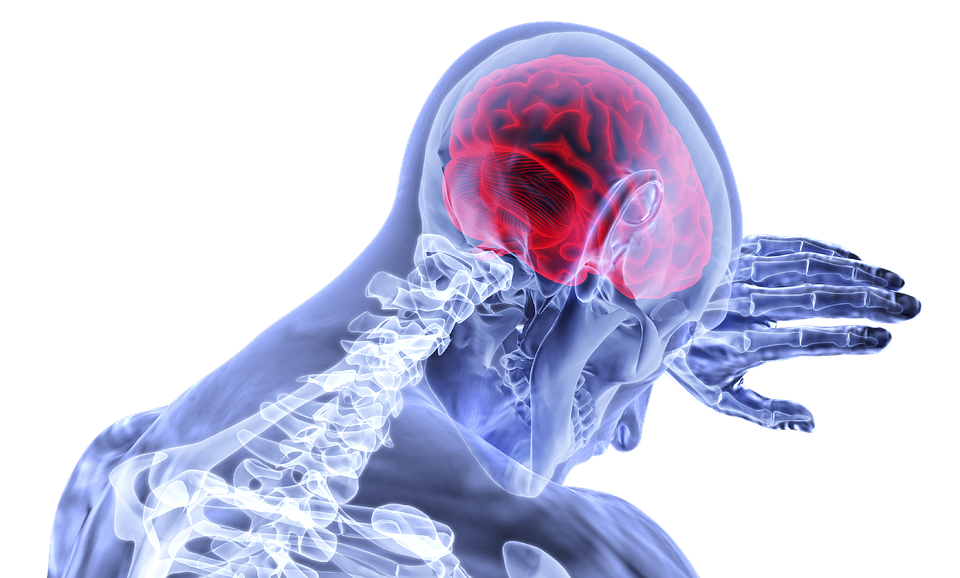

# Stroke Prediction and Data Visualization with Machine Learning



According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [ ]:
! pip install -U imbalanced-learn
! pip install xgboost
! pip install mlxtend
! pip install --upgrade scikit-learn

## Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn import preprocessing
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from mlxtend.classifier import StackingClassifier
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
%config InlineBackend.figure_format = 'png'

## About the Features



1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Load Data

In [ ]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv') #reading the data

## Exploratory Data Analysis

In [ ]:
df.head() #show first 5 row

In [ ]:
df.tail() #show last 5 row 

In [ ]:
df.age = df.age.round().astype('int')

In [ ]:
df = df.drop('id', axis = 1) #drop id

In [ ]:
df[df.gender=="Other"] #show gender = other 

In [ ]:
df= df.drop(index = 3116) #drop this row by index

In [ ]:
df['gender'].value_counts() #show all gender value 

In [ ]:
# replace every yes with married and every no with single 
df['ever_married'].replace({"Yes": "married", "No": "single"}, inplace=True) 

In [ ]:
df["ever_married"].value_counts() #show all every married value 

In [ ]:
# replace every 1 with yes and every 0 with no 
df['stroke'].replace({1: "yes", 0: "no"}, inplace=True) 

In [ ]:
df["stroke"].value_counts() #show all stroke value 

In [ ]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset") # #show number of rows and columns

In [ ]:
df.columns #show columns name 

In [ ]:
df.describe().T #summary statistic 

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value") #show unique value 

In [ ]:
#show numircal and categorical columns 
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns
print(f'Numerical Columns:  {df[numerical].columns}')
print(f'Categorical Columns: {df[categorical].columns}')

In [ ]:
df.duplicated().value_counts() #show duplicated value 

## Check for NaN values

In [ ]:
stroke_list = list(df.columns.values) #show all null value 

for stroke in stroke_list:
    print (stroke,": ",sum(pd.isnull(df[stroke])))

#### We have 201 NaN in bmi .

I want to delete null values

In [ ]:
df = df.dropna() #drop null value 

In [ ]:
stroke_list = list(df.columns.values) #show all null value 

for stroke in stroke_list:
    print (stroke,": ",sum(pd.isnull(df[stroke])))

## Remove outliers

In [ ]:
plt.figure(figsize = [10,8]) 
sns.boxplot(data=df);#show all outlier 

In [ ]:
#this function replace all outlier with mean 
def clean_outlier(column):
    q1 = np.quantile(df[column], 0.45)
    q3 = np.quantile(df[column], 0.74)
    IQR = q3 - q1
    
    min_range = q1 - 1.5 * IQR
    max_range = q3 + 1.5 * IQR
    
    mean = df[column].mean()
    df.loc[(df[column] < min_range), column] = mean
    df.loc[(df[column] > max_range), column] = mean
    

clean_outlier('avg_glucose_level')
clean_outlier('bmi')

pd.set_option('display.float_format', lambda x:'%.2f'% x)
df.describe()

In [ ]:
plt.figure(figsize = [10,8])
sns.boxplot(data=df); #show all outlier

## Solve the Questions

## Q1: Who are most at risk for a stroke, urban populations or rural populations ?

In [ ]:
ss=df.groupby(["Residence_type"])[["stroke"]].count()
ss

## Q2:Who is more likely to have a stroke male or female ?

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x="gender", hue="stroke" , palette=["#A9A9A9","#32CD32"]);
plt.title("Stroke and Gender ",fontsize =14);#This statement for write in Title 
plt.savefig('SDAIA.png')

## Q3:Is age a cause of stroke?

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Age and Stroke ')
sns.histplot(data=df[['age','stroke']],x='age',element='poly',hue='stroke', palette=["#A9A9A9","#32CD32"])
plt.savefig('SDAIA.png')

## Q4:Is smoking a cause of stroke?

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x="smoking_status", hue="stroke", palette=["#A9A9A9","#32CD32"])
plt.title("Stroke and Smoking Status ",fontsize =14);#This statement for write in Title 
plt.savefig('SDAIA.png')

## Applying label encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'stroke'.
df['stroke']= label_encoder.fit_transform(df['stroke'])
 
df['stroke'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'gender'.
df['gender']= label_encoder.fit_transform(df['gender'])
 
df['gender'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'ever_married'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
 
df['ever_married'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'smoking_status'.
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
 
df['smoking_status'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'work_type'.
df['work_type']= label_encoder.fit_transform(df['work_type'])
 
df['work_type'].unique()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Residence_type'.
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
 
df['Residence_type'].unique()

In [ ]:
sns.pairplot(df,hue='stroke'); 

In [ ]:
sns.heatmap(df.corr(),annot = True,cmap="Greens");
plt.title('Correlation Between Features'); #show Correlation Between Features

## Imblance problem 

In [ ]:
df['stroke'].value_counts()

In [ ]:
sns.histplot(df["stroke"],bins=2,color="#32CD32");
plt.savefig('SDAIA.png')

##### 

We notice that we hava imblance problem 

## Before Solving a Imblance problem :

## Split Data

In [ ]:
R = df["stroke"]
W = df.drop('stroke',axis=1)

## Feature selection

In [ ]:
print('Original X Shape is ' , W.shape)
FeatureSelection = SelectPercentile(score_func = chi2, percentile=40) # score_func can = f_classif
A = FeatureSelection.fit_transform(W,R)

In [ ]:
print('Selected Features are : ' , FeatureSelection.get_support())

In [ ]:
R=df["stroke"]
W= df.filter(["age","hypertension","heart_disease"], axis=1)
W_train, W_test, R_train, R_test = train_test_split(W, R, test_size=0.20, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
W_train_scaled = scaler.fit_transform(W_train)
W_test_scaled = scaler.transform(W_test)

## Apply ML Model

## Here I take different machine learning algorithm and try find algorithm which predict accurately.
1-Logistic Regression


## LogisticRegression

In [ ]:
penalty = ['l1', 'l2']
C = [0.001,0.01,0.5, 0.6, 0.7, 0.8,1,10,100,1000]

solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C,solver=solver)

print(param_grid)

In [ ]:
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(W_train_scaled, R_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [ ]:
log_reg_predicted = grid.predict(W_test_scaled)
log_reg_matrix = confusion_matrix(R_test, log_reg_predicted)
log_reg_acc_score = accuracy_score(R_test, log_reg_predicted)
print(log_reg_matrix)
print("\n")
log_reg_acc_score = accuracy_score(R_test, log_reg_predicted)
print("Accuracy of Logistic Regression:",log_reg_acc_score*100,'\n')
print(classification_report(R_test,log_reg_predicted))

In [ ]:
sns.heatmap(log_reg_matrix,annot= True,fmt='g', cmap=plt.cm.Greens)
plt.title('Logistic Regression');
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.savefig('SDAIA.png')

## --------------------------------------------------------------------------------------------------------------------------------

## After Solving a Imblance problem :

In [ ]:
y = df["stroke"]
X = df.drop('stroke',axis=1)

In [ ]:
print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = chi2, percentile=40) # score_func can = f_classif
A = FeatureSelection.fit_transform(X,y)

In [ ]:
print('Selected Features are : ' , FeatureSelection.get_support())

In [ ]:
y=df["stroke"]
X= df.filter(["age","hypertension","heart_disease"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
X_over,y_over=rus.fit_resample(X_train,y_train)

In [ ]:
sns.histplot(y_over,bins=2,color="#32CD32");
plt.savefig('SDAIA.png')

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)

## Apply ML Model

## Here I take different machine learning algorithm and try find algorithm which predict accurately.
1-Logistic Regression

2-Decision Tree Classifier

3-Random Forest Classifier

4-K-Neighbors Classifier

5-Support Vector Classifier

6-XGB Classifier

7- Stacking 

## Logistic Regression

In [ ]:
penalty = ['l1', 'l2']
C = [0.001,0.01,0.5, 0.6, 0.7, 0.8,1,10,100,1000]

solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C,solver=solver)

print(param_grid)

In [ ]:
log_reg = LogisticRegression(random_state=42)
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [ ]:
log_reg_predicted = grid.predict(X_test_scaled)
log_reg_matrix = confusion_matrix(y_test, log_reg_predicted)
log_reg_acc_score = accuracy_score(y_test, log_reg_predicted)
print(log_reg_matrix)
print("\n")
log_reg_acc_score = accuracy_score(y_test, log_reg_predicted)
print("Accuracy of Logistic Regression:",log_reg_acc_score*100,'\n')
print(classification_report(y_test,log_reg_predicted))

In [ ]:
print("Recall (Test Set): %.4f" % recall_score(y_test, log_reg_predicted))

In [ ]:
sns.heatmap(log_reg_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('Logistic Regression');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## K-Neighbors Classifier

In [ ]:
k_range = list(range(1, 50))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

In [ ]:
knn =KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [ ]:
knn_predicted = grid.predict(X_test_scaled)
knn_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(knn_matrix)
print("\n")
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Accuracy of KNeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

In [ ]:
sns.heatmap(knn_matrix ,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('KNeighborsClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## Decision Tree Classifier

In [ ]:
dt_range = list(range(1, 31))
param_grid = dict(max_depth=dt_range)
print(param_grid)

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(decisiontree, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [ ]:
dt_predicted = grid.predict(X_test_scaled)
dt_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print(dt_matrix)
print("\n")
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

In [ ]:
sns.heatmap(dt_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('DecisionTreeClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## Random Forest Classifier

In [ ]:
param_grid ={ 
    'n_estimators': [20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,10,12,15],
    'criterion' :['gini', 'entropy']
} 

print(param_grid)

In [ ]:
randomforest = RandomForestClassifier(random_state=42)
grid = GridSearchCV(randomforest, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [ ]:
rf_predicted = grid.predict(X_test_scaled)
rf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print(dt_matrix)
print("\n")
dt_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of RandomForestClassifier:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

In [ ]:
sns.heatmap(rf_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('RandomForestClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## Support Vector Classifier

In [ ]:
param_grid =[{ "kernel":["linear"]},
             {"kernel":["poly"],"degree":[2,3]},
             {"kernel":['rbf']},
    
            ]
#dict(n_estimators=rd_range)
print(param_grid);

In [ ]:
svc =  SVC(random_state=42)
grid = GridSearchCV(svc, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [ ]:
svc_predicted = grid.predict(X_test_scaled)
svc_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print(svc_matrix)
print("\n")
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

In [ ]:
sns.heatmap(svc_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('Support Vector Classifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## XGB Classifier

In [ ]:
param_grid ={'max_depth':range(2,10,1),
             'n_estimators':range(60,220,40),
             'learning_rate':[0.1,0.01,0.05]}
    
            
#dict(n_estimators=rd_range)
print(param_grid)

In [ ]:
warnings.filterwarnings('ignore')
gbm =  xgb.XGBClassifier(random_state=42)
grid = GridSearchCV(gbm, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

In [ ]:
gbm_predicted = grid.predict(X_test_scaled)
gbm_matrix = confusion_matrix(y_test, gbm_predicted)
gbm_acc_score = accuracy_score(y_test, gbm_predicted)
print(gbm_matrix)
print("\n")
gbm_acc_score = accuracy_score(y_test, gbm_predicted)
print("Accuracy of xgb.XGBClassifier:",gbm_acc_score*100,'\n')
print(classification_report(y_test,gbm_predicted))

In [ ]:
sns.heatmap(gbm_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('XGBClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## Stacking

In [ ]:
model_vars = [LogisticRegression(),KNeighborsClassifier()]
stacked = StackingClassifier(classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)
stacked.fit(X_train_scaled, y_over)
conf_matrix=confusion_matrix(y_test, stacked.predict(X_test))
lr_acc_score = accuracy_score(y_test, stacked.predict(X_test))
print("confussion matrix")
print(conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test, stacked.predict(X_test)))

In [ ]:
sns.heatmap(conf_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('StackingClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");

## Stacking

In [ ]:
model_vars = [SVC(),xgb.XGBClassifier()]
stacked = StackingClassifier(classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)
stacked.fit(X_train_scaled, y_over)
conf_matrix=confusion_matrix(y_test, stacked.predict(X_test))
lr_acc_score = accuracy_score(y_test, stacked.predict(X_test))
print("confussion matrix")
print(conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test, stacked.predict(X_test)))

In [ ]:
sns.heatmap(conf_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('StackingClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,log_reg_predicted)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,gbm_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='XGBClassifier')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()